# ATD Scan report.

## Summary

This report is a scanned result of the Adversarial Threat Detector.

## Replay the vulnerabilities.

Replay the detected vulnerabilities.

## Preparation.

Import libraries required to replay the vulnerability and load your classifier to be verified.

### Import libraries.

Import the libraries required for verification.  
    In this section, you will use Keras to build the classifier, so you will import the Keras classes.  
    You will also import ART, a library for vulnerability verification.  
    

In [1]:
# Import libraries.
import os
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()

print('Done')

Done


### Load dataset.

Load the test data (normal data) of the classifier to be verified.  

In [2]:
# Load dataset.
X_test = np.load('/home/itakaesu/PycharmProjects/Adversarial-Threat-Detector/targets/X_test.npz')
X_test = X_test[X_test.files[0]][:100]

# Load data labels.
y_test = np.load('/home/itakaesu/PycharmProjects/Adversarial-Threat-Detector/targets/y_test.npz')
y_test = y_test[y_test.files[0]][:100]
    
print('Done.')

Done.


### Load the classifier to be verified.

Load the classifier to be verified.

In [3]:
# Load classifier.
model = load_model('/home/itakaesu/PycharmProjects/Adversarial-Threat-Detector/targets/model.h5')
model.summary()

print('Done.')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        256       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 64)       

### Evaluation of the classifier's accuracy.

You will use the test data `X_test` to evaluate the inference accuracy of the loaded classifier.

In [4]:
# Evaluation of the classifier's accuracy.
predictions = model.predict(X_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on benign test example: {}%'.format(accuracy * 100))

print('Done.')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Accuracy on benign test example: 92.0%
Done.


## Evasion Attacks

The Evasion Attack is an attack that causes the target classifier to misclassify the Adversarial Examples into the class intended by the adversary.

### Execution of FGSM.

You use the Adversarial Examples created by ATD to replay the vulnerability.

#### Load Adversarial Examples.

In [5]:
# Load Adversarial Examples.
X_adv = np.load('/home/itakaesu/PycharmProjects/Adversarial-Threat-Detector/reports/../reports/20210215074917_scan/adv_fgsm.npz')
X_adv = X_adv['adv']

print('Done.')

Done.


#### Data Visualization.

In [6]:
# Select 25 samples.
show_normal = []
show_AEs = []
for _ in range(5 * 5):
    idx = random.randint(0, 100-1)
    show_AEs.append(X_adv[idx])
    show_normal.append(X_test[idx])

print('Done.')

Done.


#### Visualization of normal data.

Done.


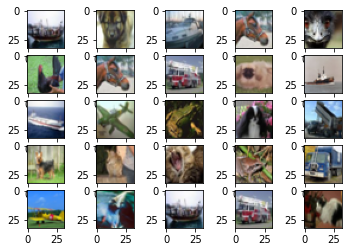

In [7]:
# Visualization of normal data.
for idx, image in enumerate(show_normal):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(image)

print('Done.')

#### Visualization of Adversarial Examples.

Done.


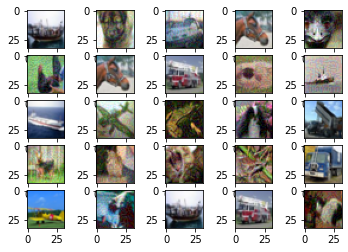

In [8]:
# Visualization of Adversarial Examples.
for idx, image in enumerate(show_AEs):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(image)

print('Done.')

#### Accuracy evaluation for Adversarial Examples.

In [9]:
# Evaluating the inference accuracy of your classifiers using Adversarial Examples.
predictions = model.predict(X_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Examples: {}%'.format(accuracy*100))
    
print('Done.')

Accuracy on Adversarial Examples: 42.0%
Done.


## Countermeasures.

There are multiple countermeasures against Adversarial Examples.  
Defense in depth is important because there are attack methods that can defeat individual countermeasures.   
Examples of countermeasures are as follows.  

* Data Augmentation  
* [Defensive distillation](https://arxiv.org/abs/1511.04508)  
* Ensemble Method  
* [Feature Squeezing](https://arxiv.org/abs/1704.01155)  
* [Detecting Adversarial Examples with AI](https://arxiv.org/abs/1705.09064)  
* [Adversarial Training](https://arxiv.org/abs/1705.07204)  
